In [1]:
import pandas as pd
import numpy as np
import quandl
import os
items = ["WIKI/INTC", "WIKI/QCOM", "WIKI/NVDA", "WIKI/TXN", "WIKI/BRCM", "WIKI/AAPL"]
stock_data = "stock_data"

# if directory does not exist, create & download the data
if not os.path.exists(stock_data):
    os.makedirs(stock_data)
    for item in items:
        data = quandl.get(item)
        fileName = os.path.join(stock_data, item[5:]+".csv")
        with open(fileName, 'w+') as f:
            data.to_csv(f)

In [2]:
qcom = os.path.join(stock_data, "QCOM.csv")

Open           float64
High           float64
Low            float64
Close          float64
Volume         float64
Ex-Dividend    float64
Split Ratio    float64
Adj. Open      float64
Adj. High      float64
Adj. Low       float64
Adj. Close     float64
Adj. Volume    float64
RSI            float64
StocOsci       float64
ADMI           float64
VVR            float64
SMA            float64
dtype: object
            Adj. Open  Adj. High  Adj. Low  Adj. Close  Adj. Volume  RSI  \
Date                                                                       
1991-12-16   0.399293   0.452929  0.399293    0.429091  143667200.0  NaN   
1991-12-17   0.441010   0.441010  0.417172    0.423131   16176000.0  0.0   

             StocOsci  ADMI  VVR       SMA  
Date                                        
1991-12-16  54.320988   NaN  NaN  0.429091  
1991-12-17  47.736626   NaN  0.0  0.426111  
            Adj. Open  Adj. High  Adj. Low  Adj. Close  Adj. Volume  \
Date                                   

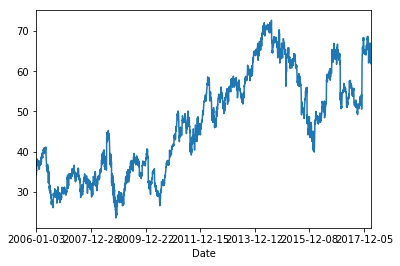

In [3]:
import matplotlib.pyplot as plt
qcom_data = pd.read_csv(qcom, index_col= [0], header=0, parse_dates=[1])
qcom_data['Open'] = qcom_data.Open.astype(float)
print(qcom_data.dtypes)
#qcom_data = qcom_data.drop(['Ex-Dividend', 'Split Ratio', 'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Volume'], axis=1)
qcom_data = qcom_data.drop(['Ex-Dividend', 'Split Ratio', 'Open', 'High', 'Close', 'Low', 'Volume'], axis=1)

print(qcom_data[:2])
print(qcom_data[-2:])

qcom_data = qcom_data.loc['2006-01-01':]
print(qcom_data[:2])
print(qcom_data.dtypes)
plt.figure()
plt.close('all')

qcom_data['Adj. Close'].plot()
#qcom_data['RSI'].plot()
#qcom_data['ADMI'].plot()
#qcom_data['VVR'].plot()
#qcom_data['SMA'].plot()
plt.show()

In [4]:
import numpy as np
from sklearn.decomposition import PCA

useful_df = qcom_data[['Adj. Close', 'RSI', 'ADMI', 'VVR', 'SMA']]
pca = PCA(n_components=3)
pca_df = pca.fit(useful_df)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_)
print(pca.components_)

[ 0.79627839  0.10807608  0.07471319]
[ 2381.64563737   323.25243875   223.46500156]
[[ 0.05112665  0.16363944  0.02506448  0.98424705  0.0351812 ]
 [ 0.68070369 -0.00260012 -0.26470601 -0.05252897  0.6810339 ]
 [ 0.17374778 -0.14050681  0.9547404  -0.01696888  0.19558214]]


(3066, 6)
              INTC         QCOM         NVDA          TXN         BRCM  \
count  3065.000000  3065.000000  3066.000000  3066.000000  2536.000000   
mean     21.938068    46.929083    33.577374    37.395884    32.176194   
std       8.484741    12.784241    46.542018    21.256818     8.747484   
min       9.052754    23.535448     5.474608    11.253862    12.668263   
25%      15.542663    34.687172    12.823574    23.698014    26.874654   
50%      18.732004    47.538240    17.367189    28.019929    31.272215   
75%      29.006603    57.085907    23.911975    47.752630    36.029589   
max      52.190000    72.674180   249.080000   120.000000    58.320000   

              AAPL  
count  3065.000000  
mean     62.727955  
std      45.780656  
min       6.511801  
25%      21.252350  
50%      54.284287  
75%      96.692834  
max     179.980000  


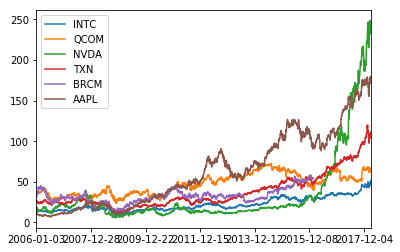

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

plt.close('all')
stock_info_df = pd.DataFrame()
for item in items:
    stock_id = item[5:]
    fileName = os.path.join(stock_data, stock_id +".csv")
    stock_dat = pd.read_csv(fileName, index_col= [0], header=0, parse_dates=[1])
    frame = stock_dat[['Adj. Close']]
    frame.columns = [stock_id]
    stock_info_df = pd.concat([stock_info_df, frame], axis=1)

info = stock_info_df.loc['2006-01-01':]
print(info.shape)
print(info.describe())
info.plot()
plt.show()

In [6]:
from stockstats import StockDataFrame

# stock = StockDataFrame.retype(info)
# print(stock['rsi_14'])
stock_df = StockDataFrame.retype(quandl.get('WIKI/AAPL'))
#stock_df['rsi_14']

In [7]:
print(stock_df.columns)
d = stock_df['rsi_14']
print(d.shape)
print(stock_df.shape)
print(stock_df.columns)
t = stock_df['kdjj']
print(t.shape)
k = stock_df['adx']
print(k.shape)
print(d[8000:8010])
print(t[8000:8010])
print(k[8000:8010])
r = stock_df['adj. close_10_sma']
print(stock_df.columns)
print(r[8000:8010])
print(stock_df['adj. close'][8000:8010])

Index(['open', 'high', 'low', 'close', 'volume', 'ex-dividend', 'split ratio',
       'adj. open', 'adj. high', 'adj. low', 'adj. close', 'adj. volume'],
      dtype='object')
(9389,)
(9389, 16)
Index(['open', 'high', 'low', 'close', 'volume', 'ex-dividend', 'split ratio',
       'adj. open', 'adj. high', 'adj. low', 'adj. close', 'adj. volume',
       'close_-1_s', 'close_-1_d', 'rs_14', 'rsi_14'],
      dtype='object')
(9389,)
(9389,)
Date
2012-08-29    72.079608
2012-08-30    64.292658
2012-08-31    64.876785
2012-09-04    68.777632
2012-09-05    64.990877
2012-09-06    67.450179
2012-09-07    69.065849
2012-09-10    56.293177
2012-09-11    54.963510
2012-09-12    59.384439
Name: rsi_14, dtype: float64
Date
2012-08-29    84.086657
2012-08-30    56.056377
2012-08-31    45.971942
2012-09-04    65.292573
2012-09-05    57.058544
2012-09-06    72.054749
2012-09-07    87.647585
2012-09-10    39.960705
2012-09-11    12.145407
2012-09-12    27.557781
Name: kdjj, dtype: float64
Date
2012-08-

                INTC      QCOM      NVDA       TXN      BRCM      AAPL
2006-01-03       NaN       NaN       NaN       NaN       NaN       NaN
2006-01-04  0.013293  0.032500  0.027996  0.009025 -0.000618  0.002943
2006-01-05  0.013898 -0.004843  0.022652  0.017889  0.032132 -0.007870
2006-01-06  0.001523  0.047556  0.016426  0.009080  0.045899  0.025813
2006-01-09  0.006081  0.004434  0.027914 -0.007837  0.031101 -0.003277


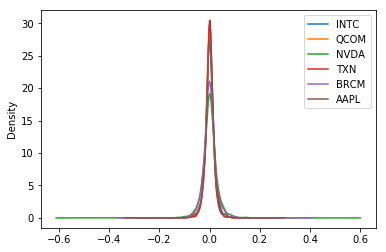

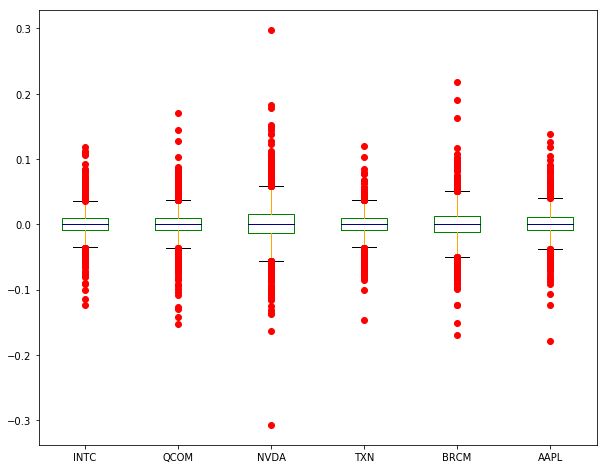

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

plt.close('all')
info_percent_change = info.pct_change()
print(info_percent_change[:5])
info_percent_change.plot.kde()

color = dict(boxes='green', whiskers='orange', medians='DarkBlue', caps='Black')
info_percent_change.plot.box(figsize=(10,8), color=color, sym='ro')

plt.show()

Adj. Open      float64
Adj. High      float64
Adj. Low       float64
Adj. Close     float64
Adj. Volume    float64
RSI            float64
StocOsci       float64
ADMI           float64
VVR            float64
SMA            float64
dtype: object


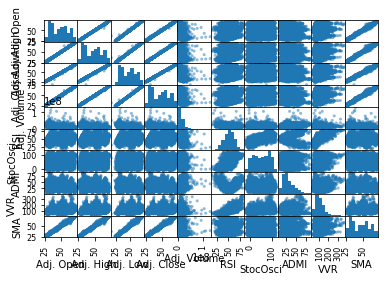

In [9]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
print(qcom_data.dtypes)
#qcom_data.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
#plt.show()
scatter_matrix(qcom_data)
plt.show()

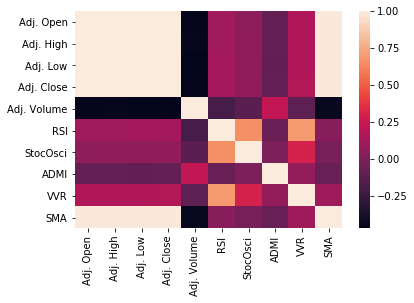

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

corrdata = qcom_data.corr()

sb.heatmap(corrdata,
            xticklabels=corrdata.columns.values,
            yticklabels=corrdata.columns.values)
plt.show()

In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

stockData = qcom_data
print(stockData.dtypes)
X = stockData.drop(['Adj. Close'], axis=1)
y = stockData[['Adj. Close']]#.astype(np.int64)
scalerX = MinMaxScaler(feature_range=(0, 1))
scalerY = MinMaxScaler(feature_range=(0, 1))
X_scaled = scalerX.fit_transform(X[X.columns])
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
y_scaled = scalerY.fit_transform(y[y.columns])
y_scaled = pd.DataFrame(y_scaled, columns=y.columns)
print("Inputs ares : ")
print(X_scaled.dtypes)
print(y_scaled.dtypes)

Adj. Open      float64
Adj. High      float64
Adj. Low       float64
Adj. Close     float64
Adj. Volume    float64
RSI            float64
StocOsci       float64
ADMI           float64
VVR            float64
SMA            float64
dtype: object
Inputs ares : 
Adj. Open      float64
Adj. High      float64
Adj. Low       float64
Adj. Volume    float64
RSI            float64
StocOsci       float64
ADMI           float64
VVR            float64
SMA            float64
dtype: object
Adj. Close    float64
dtype: object


In [12]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math

def score(predicted, true_label):
    return math.sqrt(mean_squared_error(true_label, predicted))

#baseline model
def run_baseline(inputs, day_label):
    # predict day's label for next day
    return day_label

In [13]:
import matplotlib.pyplot as plt
import datetime

def get_datetime_from_str(date_str):
    return datetime.datetime.strptime(date_str, '%Y-%m-%d')

def get_gap_in_months(start_date, end_date):
    return (end_date.year - start_date.year) * 12 + end_date.month - start_date.month

def plot_graph(ax, test_dat-es, prediction, actual):
    print("Test dates start {} end {}".format(test_dates[0], test_dates[-1]))
    start_date = get_datetime_from_str(test_dates[0])
    end_date = get_datetime_from_str(test_dates[-1])
    num_months = get_gap_in_months(start_date, end_date)
    print(num_months)

    ax.set_xticklabels('')
    #ax.set_xticks([datetime.date(start_year+int(i/12),1+i%12,1) for i in range(num_months)])
    ax.set_xticks([datetime.date(start_date.year+int(i),1,1) for i in range(1+int(num_months/12))])
    ax.set_xticklabels([datetime.date(start_date.year+int(i),1,1).strftime('%Y')  for i in range(1+int(num_months/12)+1)])
    ax.plot(test_dates.astype(datetime.datetime), prediction, 'r-', label = 'predicted')
    ax.plot(test_dates.astype(datetime.datetime), actual, 'g-.', label = 'actual')
    ax.legend(loc='upper right', shadow=True).get_frame().set_facecolor('0.8')


(3065, 9)
1023
Index(['Adj. Close'], dtype='object')
(2040, 1)
   Adj. Close  Adj. Close
0   33.300447   32.239242
1   32.239242   32.716373
2   32.716373   32.296827
3   32.296827   32.601204
4   32.601204   31.400150
(2040, 1)
(2040, 1)
Test dates start 2010-01-29 end 2018-03-09
98
PredictedValueDf Shape: (2040, 1)
TrueValueDf Shape: (2040, 1)
2044
Index(['Adj. Close'], dtype='object')
(1019, 1)
   Adj. Close  Adj. Close
0   66.813956   66.972680
1   66.972680   66.672868
2   66.672868   66.514144
3   66.514144   66.055608
4   66.055608   66.179060
(1019, 1)
(1019, 1)
Test dates start 2014-02-20 end 2018-03-09
49
PredictedValueDf Shape: (1019, 1)
TrueValueDf Shape: (1019, 1)
[0.866907814199021, 0.9885573146623687]


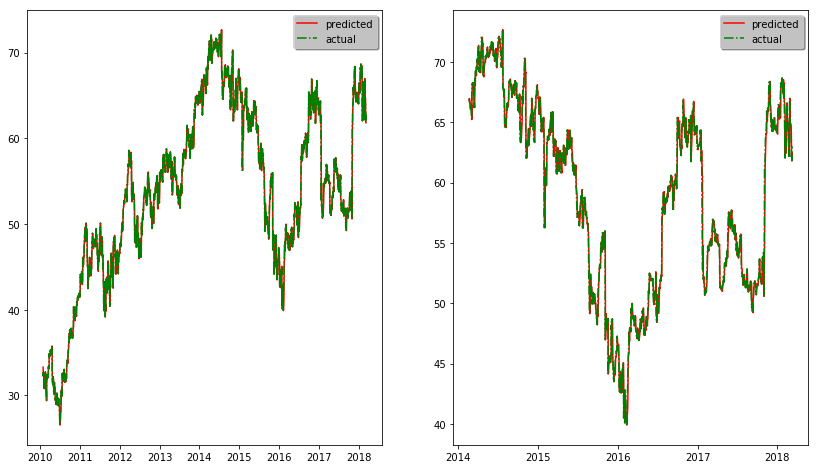

In [14]:
from sklearn.model_selection import TimeSeriesSplit

split_count = 2
tsSplit = TimeSeriesSplit(n_splits=split_count)
scores = []
print(X_scaled.shape)
plt.close('all')
fig, ax = plt.subplots(1,split_count, figsize=(14,8))

#def do_baseline(train_index, test_index):
for train_index, test_index in tsSplit.split(X_scaled):
    print(len(train_index))
    X_train, X_test = X_scaled[0:len(train_index)], X_scaled[1+len(train_index):]
    y_train, y_test = y_scaled[0:len(train_index)], y_scaled[1+len(train_index):]
    predictedScaled = run_baseline(X_test[:], y_test[:])
    predictedScaled = predictedScaled[:-1]
    print(predictedScaled.columns)
    print(predictedScaled.shape)
    test_dates = stockData.index.values[1+len(train_index):]
    predicted = scalerY.inverse_transform(predictedScaled[predictedScaled.columns])
    predicted_df = pd.DataFrame(predicted, columns=predictedScaled.columns)
    trueValueScaled = y_test[1:]
    test_dates = test_dates[1:]
    trueValue = scalerY.inverse_transform(trueValueScaled[trueValueScaled.columns])
    trueValue_df = pd.DataFrame(trueValue, columns=trueValueScaled.columns)
    xy = pd.concat([predicted_df, trueValue_df], axis=1)
    print(xy[:5])
    print((predicted.shape))
    print((trueValue.shape))
    plot_graph(ax[len(scores)], test_dates, predicted, trueValue)
    #ax1.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
    print("PredictedValueDf Shape: {}".format(predicted_df.shape))
    print("TrueValueDf Shape: {}".format(trueValue_df.shape))
    scores.append(score(predicted_df, trueValue_df))

print(scores)
plt.show()


(2965, 201)
(2965,)
(2965, 201)
test_dates (1975,) vs dates (2965,)
Shapes of y_hat (1975,) and y (1975,)
Test dates start 2009-12-08 end 2017-10-12
94
test_dates (987,) vs dates (2965,)
Shapes of y_hat (987,) and y (987,)
Test dates start 2013-11-11 end 2017-10-12
47


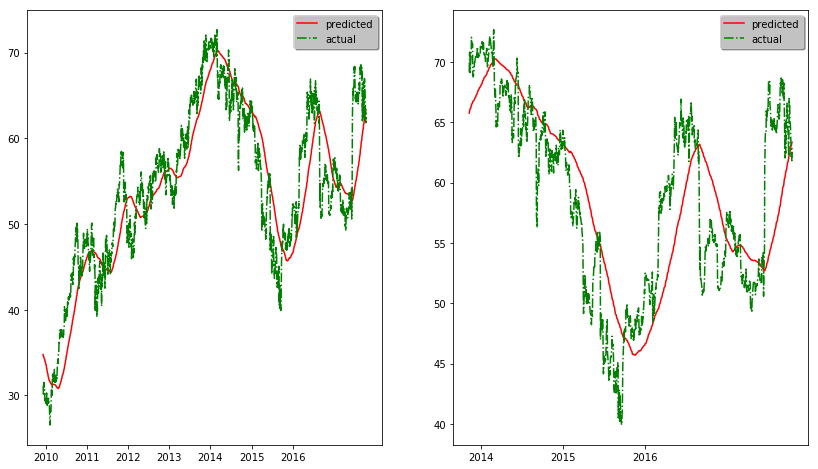

[4.331420687924502, 4.9031177775824135]


In [15]:
from sklearn.model_selection import TimeSeriesSplit

# print(qcom_data.iloc[:4]['Adj. Close'])
# print(qcom_data.iloc[:4]['Adj. Close'].shift(-1))
# temp = pd.DataFrame()
# temp['c1'] = qcom_data.iloc[:]['Adj. Close']
# temp['c2'] = qcom_data.iloc[:]['Adj. Close'].shift(-1)

# temp = temp.reset_index().drop(['Date'], axis=1)
# print(temp[:4])
# print(temp.dtypes)
split_count = 2
plt.close('all')
fig, ax = plt.subplots(1, split_count, figsize=(14,8))

def prepareData(stock_data, n_days):
    df = pd.DataFrame()
    for i in range(n_days):
        closeCol = 'c' + str(i);
        volCol = 'v' + str(i);
        df[closeCol] = stock_data.iloc[:]['Adj. Close'].shift(-i)
        df[volCol] = stock_data.iloc[:]['Adj. Volume'].shift(-i)
    df['y'] = stock_data.iloc[:]['Adj. Close'].shift(-n_days)
    #df = df.reset_index().drop(['Date'], axis=1)
    df = df.dropna()
    print(df.shape)
    return df

def baseline_model(df, n_days):
    # predict close as of last known or the mean of n_days
    useAverage = True
    #temp = df
    result = df.drop(['y'], axis=1)
    #result['yt'] = temp['y']
    if (useAverage is True):
        c_cols = []
        for i in range(n_days):
            c_cols.append('c' + str(i))
        result['y'] = df[c_cols].mean(axis=1)
    else:
        col = 'c' + str(n_days-1)
        result['y'] = df[:][col]        
    #print("Results here:")
    #print(result)
    #result.drop(['yt'], axis=1, inplace=True)
    return result
    
def baseline_model_validation(df, n_days, splits, dates):
    tsSplit = TimeSeriesSplit(n_splits=splits)
    baseline_scores = []
    for train_index, test_index in tsSplit.split(df):
        scaler_train = MinMaxScaler(feature_range=(0, 1))
        scaler_test = MinMaxScaler(feature_range=(0, 1))
        train, test = df[0:len(train_index)], df[1+len(train_index):]
        train_scaled = scaler_train.fit_transform(train[df.columns])
        train_scaled = pd.DataFrame(train_scaled, columns=df.columns)
        test_scaled = scaler_test.fit_transform(test[df.columns])
        test_scaled = pd.DataFrame(test_scaled, columns=df.columns)
        test_dates = dates[1+len(train_index):]
        print("test_dates {} vs dates {}".format(test_dates.shape, dates.shape))

        actual = test_scaled
        predicted = baseline_model(test_scaled, n_days)
        y_hat = scaler_test.inverse_transform(predicted)
        y_hat_df = pd.DataFrame(y_hat, columns=predicted.columns)
        y = scaler_test.inverse_transform(actual)
        y_df = pd.DataFrame(y, columns=actual.columns)

        print("Shapes of y_hat {} and y {}".format(y_hat_df['y'].shape, y_df['y'].shape))
        plot_graph(ax[len(baseline_scores)], test_dates, y_hat_df['y'], y_df['y'])

        baseline_scores.append(score(y_hat_df['y'], y_df['y']))
    plt.show()
    print(baseline_scores)

history = 100
temp_data = qcom_data
#temp_data = temp_data[:8]
#print(temp_data.shape)
#print(temp_data)
d = prepareData(temp_data, history)
dates = d.index.values
d = d.reset_index().drop(['Date'], axis=1)
print(dates.shape)
print(d.shape)
#print(d)
baseline_model_validation(d, history, split_count, dates)


In [71]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import numpy as np
import matplotlib.pyplot as plt

def prepare_lstm_data(stockdf, history):
    num_samples = stockdf.shape[0] - history
    num_features = stockdf.shape[1]
    X_train = np.zeros((num_samples, history, num_features))
    y_train = np.zeros((num_samples))
    
    for i in range(num_samples):
        y_pos = i + history
        X_train[i] = stockdf[i:y_pos]
        y_train[i] = stockdf['Adj. Close'][y_pos]

    return (X_train, y_train)

def model_validation(df, n_days, splits, dates):
    plt.close('all')
    fig, ax = plt.subplots(1,splits, figsize=(14,8))

    tsSplit = TimeSeriesSplit(n_splits=splits)
    lstm_scores = []
    for train_index, test_index in tsSplit.split(df):
        scaler_train = MinMaxScaler(feature_range=(0, 1))
        scaler_test = MinMaxScaler(feature_range=(0, 1))
        train, test = df[0:len(train_index)], df[1+len(train_index):1+len(train_index)+len(test_index)]
        train_scaled = scaler_train.fit_transform(train[df.columns])
        train_scaled = pd.DataFrame(train_scaled, columns=df.columns)
        test_scaled = scaler_test.fit_transform(test[df.columns])
        test_scaled = pd.DataFrame(test_scaled, columns=df.columns)

        X_train, y_train = prepare_lstm_data(train_scaled, n_days)
        X_test, y_test = prepare_lstm_data(test_scaled, n_days)
        test_dates = dates[1+len(train_index)+n_days:1+len(train_index)+len(test_index)]

        print("X train {} and test {}".format(X_train.shape, X_test.shape))
        print("Y train {} and test {}".format(y_train.shape, y_test.shape))
        print("Test dates {}".format(test_dates.shape))
        model = Sequential()
        model.add(LSTM(20, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
        model.add(LSTM(20, return_sequences=True))
        model.add(LSTM(20))
        model.add(Dropout(0.2))
        model.add(Dense(1, activation='linear'))
        model.compile(loss='mae', optimizer='adam', metrics=['mse'])
        print(model.summary())
        history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                  epochs=10, batch_size=n_days, verbose=2)
        print(history.history.keys())
        predicted = model.predict(X_test)

        y_test = y_test.reshape(-1,1)
        print("Reshaped predicted {} and y_test {}".format(predicted.shape, y_test.shape))

        y_hat = scaler_test.inverse_transform(predicted)
        y_hat_df = pd.DataFrame(y_hat, columns=["y_hat"])
        y_actual = scaler_test.inverse_transform(y_test)
        y_actual_df = pd.DataFrame(y_actual, columns=["y"])
        labels_df = pd.concat([y_hat_df, y_actual_df], axis=1)
        print("test_dates shape {} vs y_hat shape {} vs y_test shape {}" \
              .format(test_dates.shape, y_hat.shape, y_test.shape))

        print(labels_df[:5])
        print(predicted[:5])
        print(y_test[:5])

        #plot_graph(ax[len(lstm_scores)], test_dates, y_hat, y_actual)
        # summarize history for loss
        ax[len(lstm_scores)].plot(history.history['mean_squared_error'])
        ax[len(lstm_scores)].plot(history.history['val_mean_squared_error'])
#         ax[len(lstm_scores)].title('model loss')
#         ax[len(lstm_scores)].ylabel('loss')
#         ax[len(lstm_scores)].xlabel('epoch')
#         ax[len(lstm_scores)].legend(['train', 'test'], loc='upper left')
        lstm_scores.append(score(y_hat_df['y_hat'], y_actual_df['y']))
    plt.show()
    print(lstm_scores)



In [72]:
import matplotlib.pyplot as plt

def do_next_day_prediction_on_history(n_history):
    split_count = 2
    print(qcom_data.columns)
    temp_data = qcom_data.drop(['Adj. Open', 'Adj. High', 'Adj. Low'], axis=1)
    temp_data = temp_data.drop(['RSI', 'StocOsci', 'ADMI', 'VVR', 'SMA'], axis=1)
    temp_data = temp_data.drop(['Adj. Volume'], axis=1)
    #temp_data = qcom_data
    print(temp_data.columns)
    dates = qcom_data.index.values
    print(dates.shape)
    model_validation(temp_data, n_history, split_count, dates)

Index(['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume',
       'RSI', 'StocOsci', 'ADMI', 'VVR', 'SMA'],
      dtype='object')
Index(['Adj. Close'], dtype='object')
(3065,)
X train (1013, 10, 1) and test (1011, 10, 1)
Y train (1013,) and test (1011,)
Test dates (1011,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_52 (LSTM)               (None, 10, 20)            1760      
_________________________________________________________________
lstm_53 (LSTM)               (None, 10, 20)            3280      
_________________________________________________________________
lstm_54 (LSTM)               (None, 20)                3280      
_________________________________________________________________
dropout_20 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)              

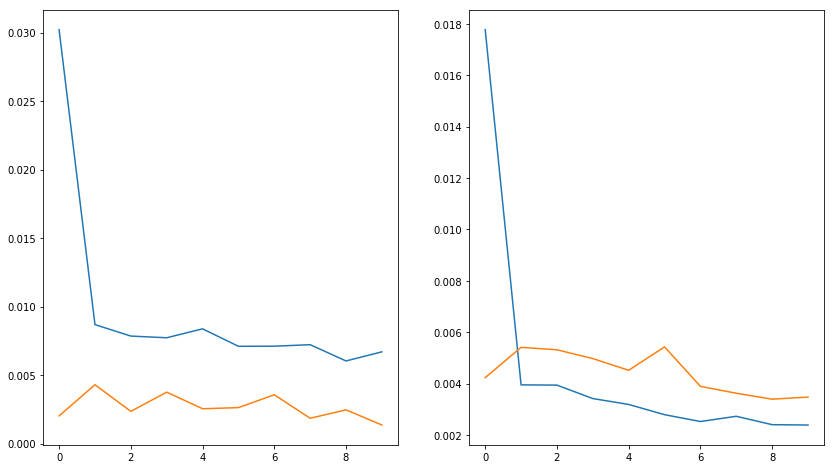

[1.5023581511504083, 1.93245564363245]


In [73]:
do_next_day_prediction_on_history(10)
#[1.043005275481809, 1.0550654954881733] for 10 history

In [214]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import numpy as np
import matplotlib.pyplot as plt

def prepare_future_prediction_lstm_data(stockdf, history, after = 5):
    num_samples = stockdf.shape[0] - history - after
    num_features = stockdf.shape[1]
    X_train = np.zeros((num_samples, history, num_features))
    y_train = np.zeros((num_samples))
    
    for i in range(num_samples):
        y_pos = i + history
        X_train[i] = stockdf[i:y_pos]
        if (after != 0):
            y_train[i] = stockdf['Adj. Close'][i+after]

    return (X_train, y_train)

def run_model_for_future_prediction(df, n_days, splits, dates, after = 10):
    plt.close('all')
    fig, ax = plt.subplots(1,splits, figsize=(14,8))

    tsSplit = TimeSeriesSplit(n_splits=splits)
    lstm_scores = []
    for train_index, test_index in tsSplit.split(df):
        scaler_train = MinMaxScaler(feature_range=(0, 1))
        scaler_test = MinMaxScaler(feature_range=(0, 1))
        train, test = df[0:len(train_index)], df[1+len(train_index):]
        train_scaled = scaler_train.fit_transform(train[df.columns])
        train_scaled = pd.DataFrame(train_scaled, columns=df.columns)
        test_scaled = scaler_test.fit_transform(test[df.columns])
        test_scaled = pd.DataFrame(test_scaled, columns=df.columns)

        X_train, y_train = prepare_future_prediction_lstm_data(train_scaled, n_days, after)
        X_test, y_test = prepare_future_prediction_lstm_data(test_scaled, n_days, after)
        test_dates = dates[1+len(train_index):-n_days]

        print("X train {} and test {}".format(X_train.shape, X_test.shape))
        model = Sequential()
        model.add(LSTM(32, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
        model.add(LSTM(32, return_sequences=True))
        model.add(LSTM(32))
        model.add(Dropout(0.2))
        model.add(Dense(1, activation='linear'))
        model.compile(loss='mae', optimizer='adam')
        print(model.summary())
        model.fit(X_train, y_train, #validation_data=(X_test, y_test),
                  epochs=5, batch_size=10)
        prediction_after_days = model.predict(X_test)
        # feed the 5 day prediction to get prediction after 10 days
        # we are essentially using prediction to predict
        print("Shape of pred {}".format(prediction_after_days.shape))
        (prediction_after_days, ignore) = prepare_future_prediction_lstm_data(prediction_after_days, n_days, 0)
        print("Shape of pred {}".format(prediction_after_days.shape))
        predicted = model.predict(prediction_after_days)
#         print("test_dates shape {} vs y_hat shape {} vs y_test shape {}" \
#               .format(test_dates.shape, y_hat.shape, y_test.shape))

        y_test = y_test.reshape(-1,1)
        print("Reshaped predicted {} and y_test {}".format(predicted.shape, y_test.shape))

        y_hat = scaler_test.inverse_transform(predicted)
        y_hat_df = pd.DataFrame(y_hat, columns=["y_hat"])
        y_actual = scaler_test.inverse_transform(y_test[10:])
        y_actual_df = pd.DataFrame(y_actual, columns=["y"])
        labels_df = pd.concat([y_hat_df, y_actual_df], axis=1)
        print(labels_df[:5])
        print(predicted[:5])
        print(y_test[:5])

        print("dates shape{} y_hat shape {} y_actual shape{}".format(test_dates[n_days+after:].shape, y_hat.shape, y_actual.shape))
        plot_graph(ax[len(lstm_scores)], test_dates[n_days+after:], y_hat, y_actual)
        lstm_scores.append(score(y_hat_df['y_hat'], y_actual_df['y']))
    plt.show()
    print(lstm_scores)

Index(['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume'], dtype='object')
Index(['Adj. Close'], dtype='object')
(3058,)
X train (746, 10, 1) and test (2271, 10, 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_77 (LSTM)               (None, 10, 20)            1760      
_________________________________________________________________
lstm_78 (LSTM)               (None, 256)               283648    
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 257       
Total params: 285,665.0
Trainable params: 285,665.0
Non-trainable params: 0.0
_________________________________________________________________
None
Epoch 1/5
746/746 [==============================] - 15s - loss: 0.0845     

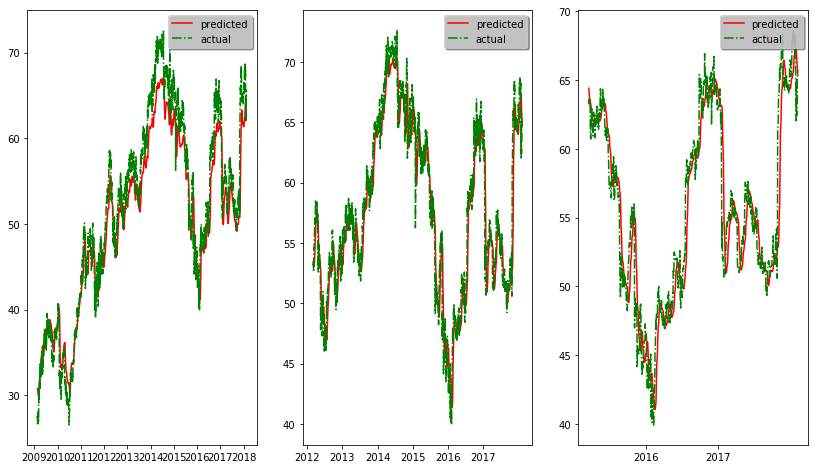

[2.880249529172964, 1.948572333776737, 2.3015234378571376]


In [217]:
import matplotlib.pyplot as plt

def do_future_prediction_using_prediction(n_history):
    split_count = 2
    print(qcom_data.columns)
    temp_data = qcom_data.drop(['Adj. Open', 'Adj. High', 'Adj. Low'], axis=1)
    temp_data = temp_data.drop(['Adj. Volume'], axis=1)
    #temp_data = qcom_data
    print(temp_data.columns)
    dates = qcom_data.index.values
    print(dates.shape)
    run_model_for_future_prediction(temp_data, n_history, split_count, dates)
do_future_prediction_using_prediction(10)
#[2.2421271419658226, 1.8330538477511904] use 10 history for 10 days into future
